In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.DATA COLLECTION

In [4]:
df=pd.read_csv('Salary_Data.csv')

# 2.DATA EXPLORATION

In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# 3.DATA CLEANING

In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# 4.PLOTTING GRAPH

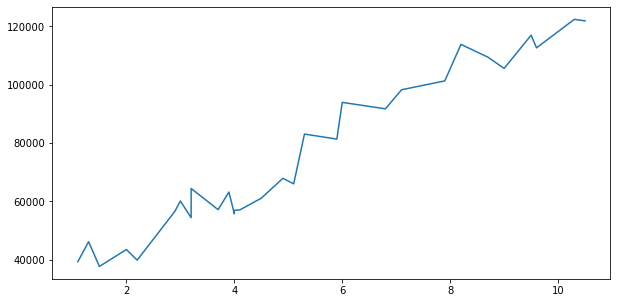

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df.YearsExperience,df.Salary)

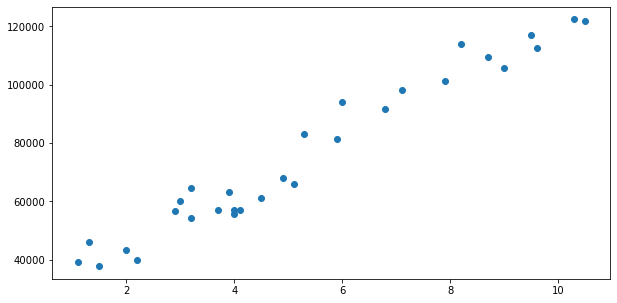

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(df.YearsExperience,df.Salary)

# 5.MODEL BUILDING

# FROM SCRATCH

In [24]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [25]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [26]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

# Y_PREDICT = W0+(W1*X)                                  #REGRESSION LINE EQUATION

# w0=(y_mean) - (w1*(x_mean))

# w1= sum(x-x_mean)*(y-y_mean)/sum(x-x_mean)^2

In [27]:
# Mean_X and Mean_Y
mean_x=np.mean(x)
mean_y=np.mean(y)

# Total length of the Dataset
n=len(x)

# Using The formula caluculate the w0 and w1
numer=0
denom=0

for i in range(n):
    numer+=(x[i]-mean_x)*(y[i]-mean_y) 
    denom+=(x[i]-mean_x)**2
    
w1=numer/denom
w0=mean_y-(w1*mean_x)
print('The Coefficients are',w0,w1)

The Coefficients are [25792.20019867] [9449.96232146]


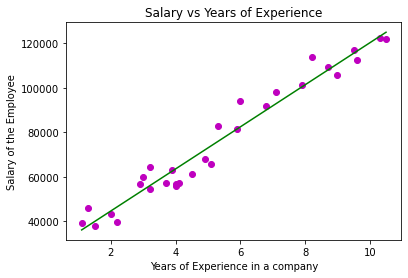

In [28]:
plt.scatter(x,y,color='m')

# claculate the y_pred
y_pred=w0+w1*x

#plot the regressor line
plt.plot(x,y_pred,color='g')

#putting the lables
plt.xlabel('Years of Experience in a company')
plt.ylabel('Salary of the Employee')
plt.title('Salary vs Years of Experience')

#show the plot
plt.show()


In [29]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [30]:
y_pred

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

# MEASURING ACCURACY

In [31]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)*100

95.69566641435085

# FROM USING LIBRARIES

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()

In [34]:
model.fit(x,y)

LinearRegression()

In [35]:
y_pred_lib=model.predict(x)

In [36]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [37]:
y_pred_lib

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

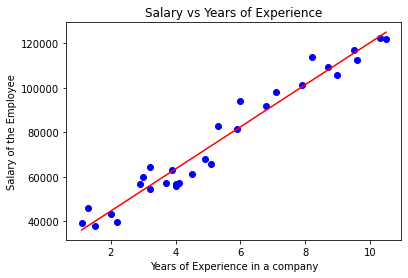

In [38]:
plt.scatter(x,y,color='b')

#plot the regressor line
plt.plot(x,y_pred_lib,color='r')

#putting the lables
plt.xlabel('Years of Experience in a company')
plt.ylabel('Salary of the Employee')
plt.title('Salary vs Years of Experience')

#show the plot
plt.show()

# MEASURING ACCURACY

In [39]:
from sklearn.metrics import r2_score
r2_score(y,y_pred_lib)*100

95.69566641435085

# TESTING

In [40]:
x=[[12]]
model.predict(x)

array([139191.74805613])

In [41]:
w0+w1*x
25792.20019867+ (9449.96232146*12)

139191.74805619

# End